### Homework 1 PROGRAMMING EXERCISES
#### Part1. Warm Up

1. Let $ a=array[1,2,3,4,5,6,7,8] $. Reshape a into a 2 by 4 matrix.

In [29]:
import torch

a = [1,2,3,4,5,6,7,8]
original_tensor = torch.tensor([a])
reshaped_tensor = original_tensor.view(2, 4)

print(reshaped_tensor)


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


2. Let a be a pytorch tensor constructed with elements $ [1,3,5,6] $, and let b be a tensor constructed with elements $ [5,6,8,9] $. 
Write a sequence of lines, one each to perform the following operations on a and b. 

In [30]:
a = torch.tensor([1,3,5,6])
b = torch.tensor([5,6,8,9])

* Elementwise addition

In [31]:
result = a + b
print(result)

tensor([ 6,  9, 13, 15])


* Elementwise multiplication

In [32]:
result = a * b
print(result)

tensor([ 5, 18, 40, 54])


* Elementwise power

In [33]:
result = torch.pow(a, b)
print(result)

tensor([       1,      729,   390625, 10077696])


* Dot product between a and b

In [34]:
result = torch.dot(a, b)
print(result)

tensor(117)


* Dot product between an elementwise exponentiation of a with base e and an elementwise
natural logarithm of b

In [35]:
result = torch.dot(torch.exp(a),torch.log(b))
print(result)

tensor(1235.4036)


3. Use tensor and autograd from the pytorch package to complete the following questions:
* Calculate the gradient of
    $$ g(x,y,z,k)\ =\ e^xx^2+3e^yy^2+5e^zz^2+6e^kk^2 $$ 
    Evaluated at the point $ (x=5,y=6,z=8,k=9) $

In [36]:
a = torch.tensor([1,3,5,6], dtype=torch.float32, requires_grad= True)
b = torch.tensor([5,6,8,9], dtype=torch.float32, requires_grad= True)
result = torch.dot(a, (torch.exp(b) * b ** 2))
result.backward()
gradients = b.grad

print("Values:", b)
print("Gradients:", gradients)


Values: tensor([5., 6., 8., 9.], requires_grad=True)
Gradients: tensor([   5194.4609,   58093.7500, 1192383.2500, 4813232.0000])


* Let A be a matrix with values $ [4,3],[7,9] $ and B be a matrix with values $ [3,5], [1,11] $. Calculate the gradient of the following function $ f(A) $ with respect to the entries of A evaluated at the point where A takes the above values.
$$ f(A)=log‖A^T AB^T AA^T AB‖^2 $$

In [37]:
a = torch.tensor([[4,3],
                  [7,9]],dtype= torch.float32, requires_grad= True)
b = torch.tensor([[3,5],[1,11]],dtype= torch.float32, requires_grad= True)
a_t = a.t()
b_t = b.t()
matrix = a_t @ a @ b_t @ a @ a_t @ a @ b
result = torch.log(torch.norm(matrix, p=2))
result.backward()
gradients = a.grad
print(result)
print("Gradients:", gradients)

tensor(17.4227, grad_fn=<LogBackward0>)
Gradients: tensor([[0.0869, 0.1427],
        [0.1918, 0.3202]])


* Calculate the gradient of 
   $$ F (x, y) = tanh (x) + tanh (y) $$
   at the point $ (x = 3, y = 7) $.

In [38]:
x = torch.tensor([4.0], requires_grad= True)
y = torch.tensor([3.0], requires_grad= True)
result = torch.tanh(x) + torch.tanh(y)
result.backward()
gradient_x = x.grad
gradient_y = y.grad

print("Gradient at x:", gradient_x)
print("Gradient at y:", gradient_y)



Gradient at x: tensor([0.0013])
Gradient at y: tensor([0.0099])


4. Let a be a torch integer tensor containing the values $ [1, 2, 3] $.
* convert a to a numpy array and store it under a new variable b
* convert a into a float tensor



In [39]:
import numpy as np
a = torch.tensor([1, 2, 3], dtype= torch.int32)
b = a.numpy()
a = a.to(torch.float32)

print(f"Numpy array: {b}")
print(f"Float tensor: {a}")

Numpy array: [1 2 3]
Float tensor: tensor([1., 2., 3.])


5. Answer the following questions using the package Numpy:
* What is the product of matrices of matrices $ [[1, 3, 5], [2, 1, 5]] $ and $ [[8, 4], [3, 6], [2, 7]] $?

* What is the Frobenius norm of the  1 x 3  matrix $ [100, 2, 1] $?

In [40]:
a = torch.tensor([[1,3,5],[2,1,5]])
b = torch.tensor([[8,4],[3,6],[2,7]])
result_1 = torch.matmul(a,b)
c = torch.tensor([100,2,1], dtype= torch.float32)
result_2 = torch.norm(c, p=2)
print(f"The product of matrices is: {result_1}")
print(f"The Frobenius norm is {result_2}")

The product of matrices is: tensor([[27, 57],
        [29, 49]])
The Frobenius norm is 100.02499389648438


#### Part2. Housing Price

1. Join the House Prices - Advanced Regression Techniques competition on Kaggle. Download the training and test data.

In [41]:
# Import Libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [42]:
# Data Load
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [43]:
# Preview the train set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
# Preview the test set
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

2. Give 3 examples of continuous and categorical features in the dataset; choose one feature of each type and plot the histogram to illustrate the distribution.

3 Examples of dataset

In [47]:
continuous_features = train[['LotArea', 'LotFrontage', 'MasVnrArea']]
categorical_features = train[['MSZoning', 'Street', 'LotShape']]
print(continuous_features)
print(categorical_features)


      LotArea  LotFrontage  MasVnrArea
0        8450         65.0       196.0
1        9600         80.0         0.0
2       11250         68.0       162.0
3        9550         60.0         0.0
4       14260         84.0       350.0
...       ...          ...         ...
1455     7917         62.0         0.0
1456    13175         85.0       119.0
1457     9042         66.0         0.0
1458     9717         68.0         0.0
1459     9937         75.0         0.0

[1460 rows x 3 columns]
     MSZoning Street LotShape
0          RL   Pave      Reg
1          RL   Pave      Reg
2          RL   Pave      IR1
3          RL   Pave      IR1
4          RL   Pave      IR1
...       ...    ...      ...
1455       RL   Pave      Reg
1456       RL   Pave      Reg
1457       RL   Pave      Reg
1458       RL   Pave      Reg
1459       RL   Pave      Reg

[1460 rows x 3 columns]


Histogram to illustrate the distribution of Lot Frontage and Lot Shape

Text(0.5, 1.0, 'Historgram of Lotshape')

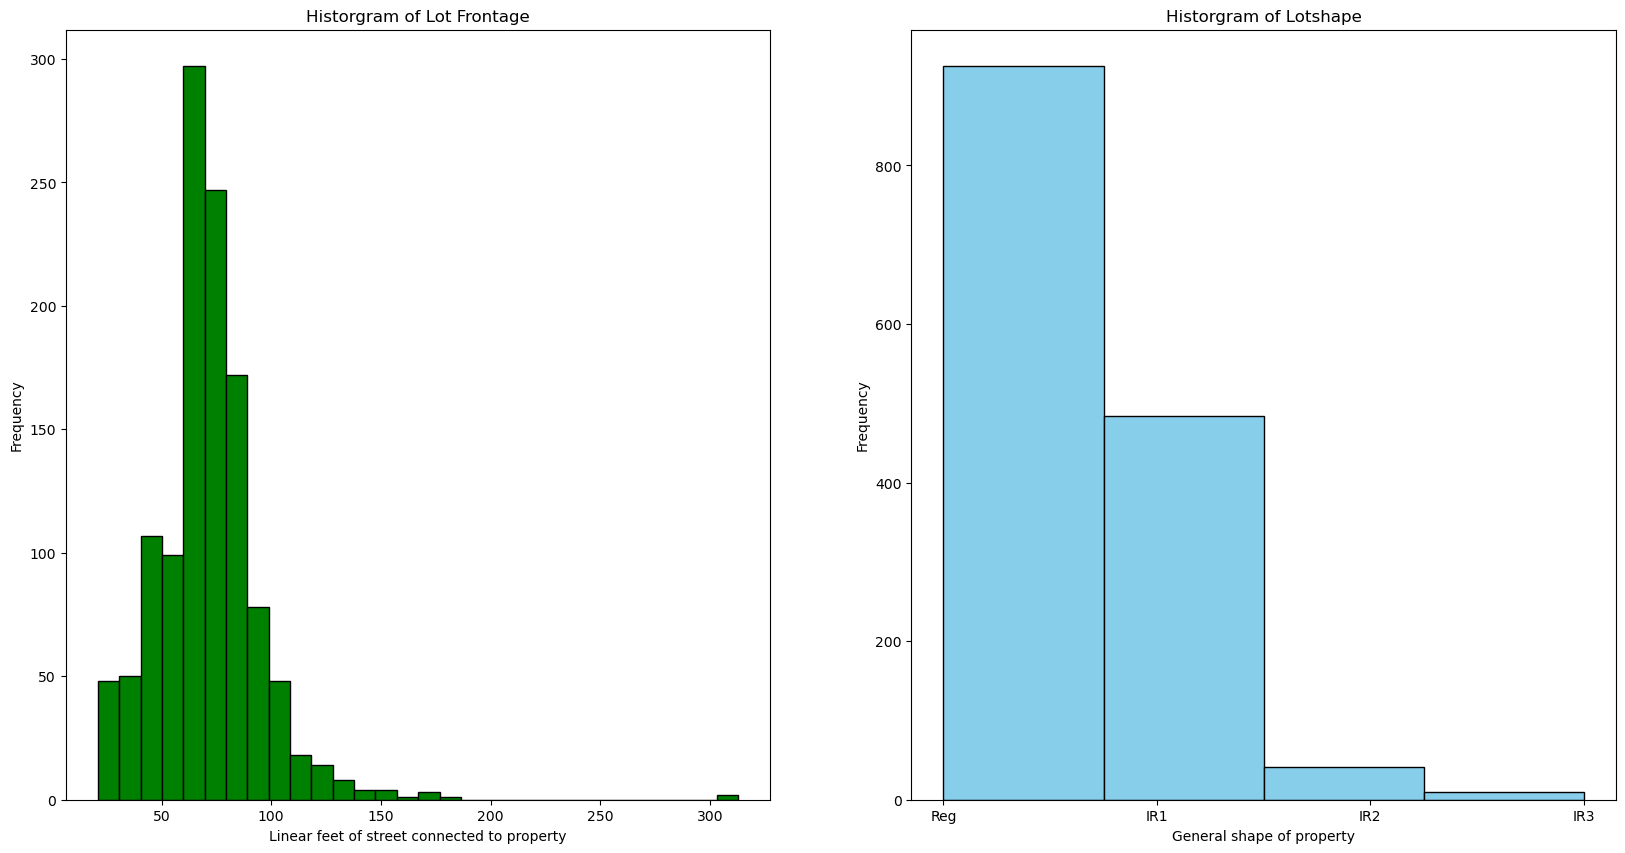

In [48]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.hist(train['LotFrontage'], bins=30, color='green', edgecolor= 'black')
plt.xlabel('Linear feet of street connected to property')
plt.ylabel('Frequency')
plt.title('Historgram of Lot Frontage')

plt.subplot(122)
plt.hist(train['LotShape'], bins=4, color='skyblue', edgecolor= 'black')
plt.xlabel('General shape of property')
plt.ylabel('Frequency')
plt.title('Historgram of Lotshape')



3. Pre-process your data, explain your pre-processing steps, and the reasons why you need them.

1. Data Loss Detection 

34
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Functional', 'Utilities', 'GarageArea', 'GarageCars', 'Electrical',
       'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1',
       'Exterior2nd', 'Exterior1st', 'SaleType'],
      dtype='object', name='Feature')


Text(0, 0.5, 'Missing Percentage')

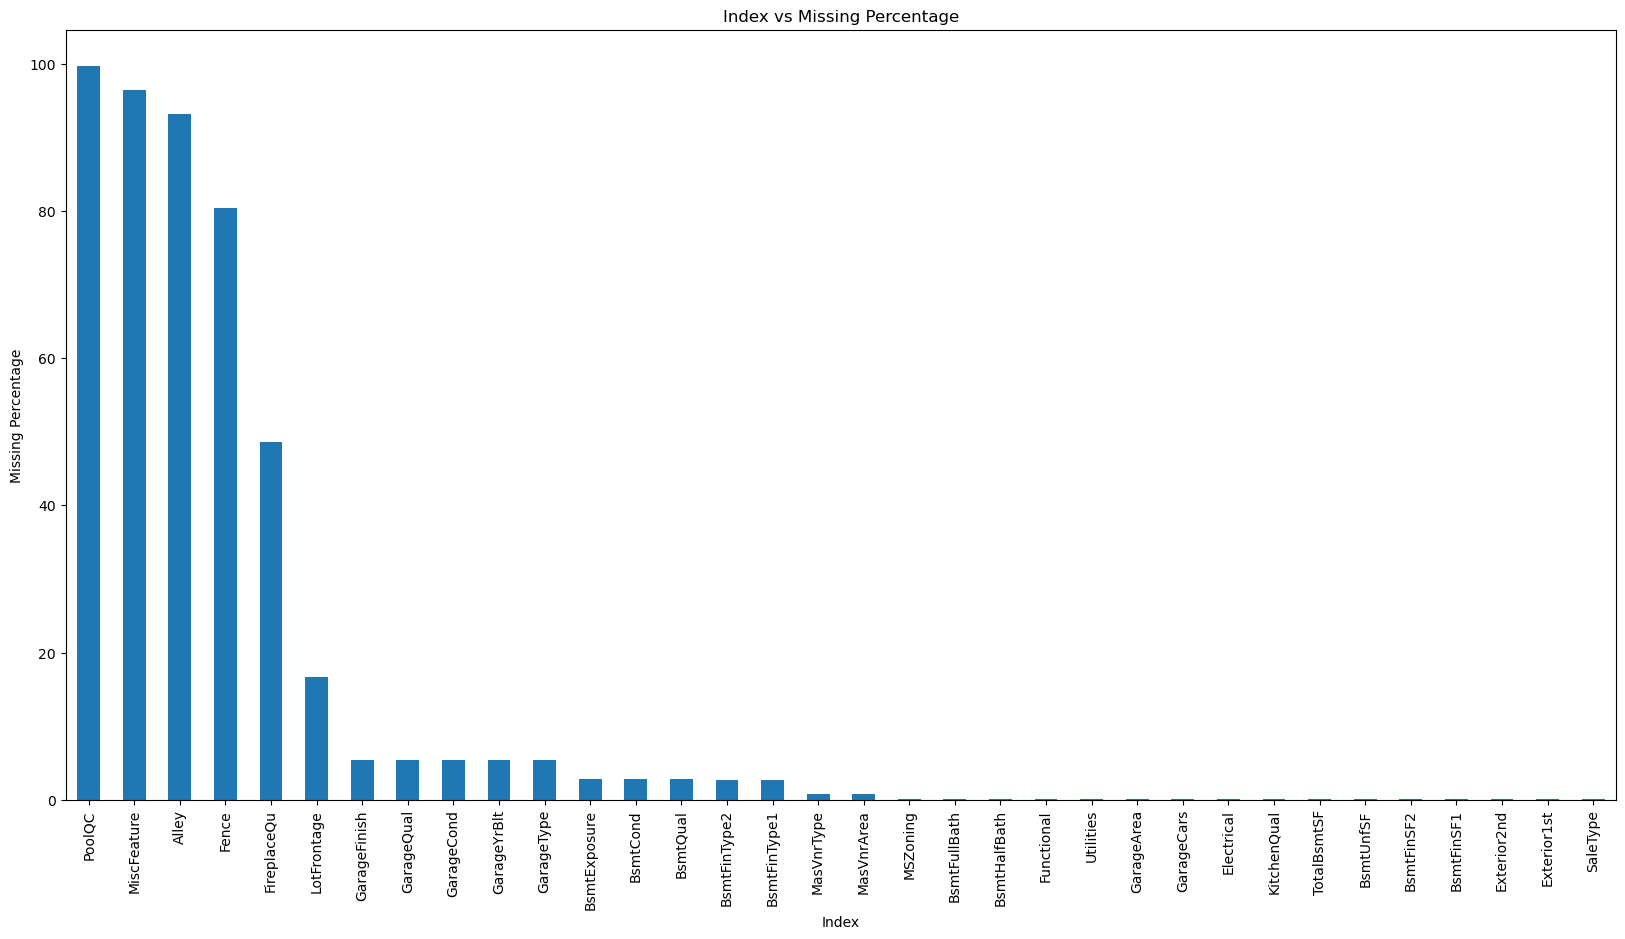

In [49]:
# Integrate the dataset to deal with the loss value
integrated_data = pd.concat((train, test), axis=0).reset_index(drop=True)
integrated_data.drop(['SalePrice'], axis=1, inplace=True)
integrated_data.drop(['Id'], axis=1, inplace=True)
# Calculate the missing percentage
total_entries = integrated_data.shape[0]
missing_percentage = pd.DataFrame((integrated_data.isna().sum() / total_entries * 100))
missing_percentage.columns = ['Missing Percentage']
missing_percentage.index.name = 'Feature'
missing_percentage = missing_percentage[missing_percentage['Missing Percentage'] != 0]
missing_percentage = missing_percentage.sort_values(by='Missing Percentage', ascending=False)
missing_percentage
print(missing_percentage.shape[0])
print(missing_percentage.index)

#Plot the distribution figure of loss
missing_percentage.plot(kind='bar', legend= False, figsize=(20,10))
plt.title('Index vs Missing Percentage')
plt.xlabel('Index')
plt.ylabel('Missing Percentage')


2. Missing Value Imputation

In [50]:
# Use none or represent the houses don't have such features
for index in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
              'GarageFinish', 'GarageQual','GarageCond', 'GarageType',
              'BsmtExposure', 'BsmtCond', 'BsmtQual','BsmtFinType2','BsmtFinType1',
              'MasVnrType'):
    integrated_data[index] = integrated_data[index].fillna('None')

# Fill in those continuous variables who have many missing values with 0, which means they don't have such characteristics
for index in ('GarageYrBlt','GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
               'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1'):
    integrated_data[index] = integrated_data[index].fillna(0)

# Fill in those variables who has little missing values with mode, they may process this feature but lost it during collection
for index in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType'):
    integrated_data[index] = integrated_data[index].fillna(integrated_data[index].mode()[0])

# Every property should have Lot Frontage and they would be similar within the neighborhood, use median with the hood to fill the NA
integrated_data['LotFrontage'] = integrated_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# According to the description, NA in Functional is 'Typ'
integrated_data['Functional'] = integrated_data['Functional'].fillna('Typ')

# The loss of value is not in the test_set, delete it directly
integrated_data = integrated_data.drop(['Utilities'], axis=1)

#Check if the loss value is fully eliminated
print(integrated_data.isnull().sum().max())


0


3. Convert the variables

In [51]:
# Convert ordinal variables to numerical variables 
from sklearn.preprocessing import LabelEncoder

ord_var = ('MSZoning','Street','Alley','LotShape','LandSlope',
'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
'BsmtFinType1','BsmtFinSF1','BsmtFinType2','HeatingQC','KitchenQual',
'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond',
'PavedDrive','PoolQC','Fence')

for col in ord_var:
        lbl = LabelEncoder()
        lbl.fit(list(integrated_data[col].values))
        integrated_data[col] = lbl.transform(list(integrated_data[col].values))

print(f"Shape all data: {format(integrated_data.shape)}")

Shape all data: (2919, 78)


4. One common method of pre-processing categorical features is to use a one-hot encoding (OHE).

   Suppose that we start with a categorical feature $ x_j $, taking three possible values: 
   
   $$ x_j ∈ {R, G, B } $$ 
   A one-hot encoding of this feature replaces $ x_j $ with three new features: $ x_{jR} $ , $ x_{jG} $ , $ x_{jB} $ . Each feature contains a binary value of 0 or 1, depending on the value taken by $ x_j $. 
   
   For example, if $ x_j = G $, then $ x_{jG} = 1 $ and $ x_{jR} = x_{jB} = 0 $.
   
   Give some examples of features that you think should use a one-hot encoding and explain why.
   
   Convert at least one feature to a one-hot encoding (you can use your own implementation, or that in pandas or scikit-learn) and visualize the results by plotting feature histograms of the original feature and its new one-hot encoding.


   Ans: For example, I think the features: MSSubClass, HouseStyle are suitable for the one hot coding. Because these two features are classification features and they don't contain orders in them. If we just use the normal coding methods like 0, 1, 2, 3, 4 will make the algorithm thinks that there exist an order within these factors and influence the accuarcy of the model.

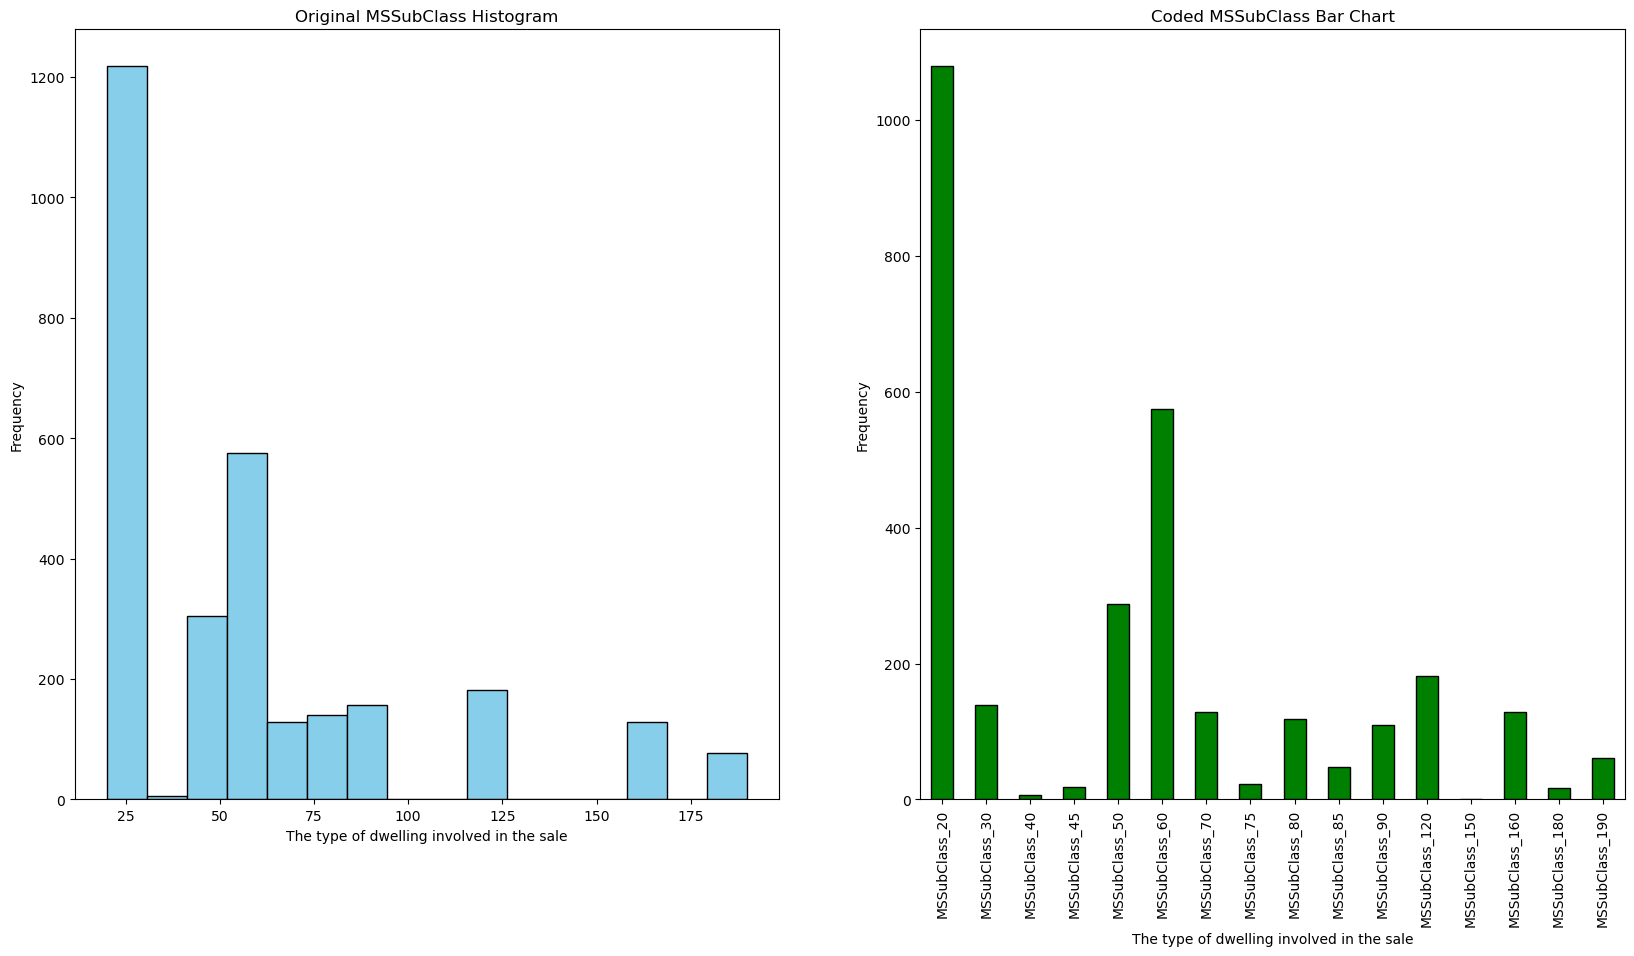

In [52]:
# Choose MSSubClass as example of one-hot coding
original_mssubclass = integrated_data['MSSubClass'].copy()
integrated_data = pd.get_dummies(integrated_data, columns=['MSSubClass'])
coded_columns = [col for col in integrated_data.columns if 'MSSubClass' in col]

plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(original_mssubclass, bins=16, color='skyblue', edgecolor='black')
plt.title('Original MSSubClass Histogram')
plt.xlabel('The type of dwelling involved in the sale')
plt.ylabel('Frequency')


plt.subplot(122)

integrated_data[coded_columns].sum().plot(kind='bar', color='green', edgecolor='black')
plt.title('Coded MSSubClass Bar Chart')
plt.xlabel('The type of dwelling involved in the sale')
plt.ylabel('Frequency')


plt.show()

In [53]:
#Use One-Hot Coding to convert all other variables
non_num_cols = integrated_data.select_dtypes(exclude=['number']).columns
integrated_data = pd.get_dummies(integrated_data, columns=non_num_cols)
print(f"Shape all data: {format(integrated_data.shape)}")

Shape all data: (2919, 232)


5. Using ordinary least squares (OLS), try to predict house prices on this dataset. 

   Choose the features (or combinations of features) you would like to use or ignore, provided you justify your choice.

   Evaluate your predictions on the training set using the MSE and the R2 score. 

   For this question, you need to implement OLS in 2 ways from pytorch.
   1) using the scikit-learn package
   2) using autograd 



In [54]:
obj_train = train.SalePrice.values
train = integrated_data[:train.shape[0]]
test = integrated_data[train.shape[0]:]

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x_train = train
y_train = obj_train
x_test = test

# Set the model
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_train_pred = model1.predict(x_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {mse}, Train R2: {r2}")


Train MSE: 487234736.5662516, Train R2: 0.9227443999473678


In [56]:
# Convert the variables to torch
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Set Parameters for OLS
w = torch.randn(x_train_tensor.shape[1], requires_grad=True) 
b = torch.zeros(1, requires_grad=True)

# Set Learning Rate and epochs
lr = 0.000000001
num_epochs = 10000

# Train the model

for epoch in range(num_epochs):
    predictions = x_train_tensor.matmul(w) + b  
    loss = torch.mean((predictions - y_train_tensor) ** 2)  
    loss.backward()

    
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        w.grad.zero_()
        b.grad.zero_()


    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    with torch.no_grad():
        y_train_pred = x_train_tensor.matmul(w) + b
        
print(f'Final learned parameters: w={w}, b={b.item()}')

Epoch [100/10000], Loss: 6922516992.0000
Epoch [200/10000], Loss: 6553702912.0000
Epoch [300/10000], Loss: 6519489536.0000
Epoch [400/10000], Loss: 6496924672.0000
Epoch [500/10000], Loss: 6477184000.0000
Epoch [600/10000], Loss: 6459723776.0000
Epoch [700/10000], Loss: 6444260352.0000
Epoch [800/10000], Loss: 6430548992.0000
Epoch [900/10000], Loss: 6418376192.0000
Epoch [1000/10000], Loss: 6407556608.0000
Epoch [1100/10000], Loss: 6397927424.0000
Epoch [1200/10000], Loss: 6389346816.0000
Epoch [1300/10000], Loss: 6381689856.0000
Epoch [1400/10000], Loss: 6374849536.0000
Epoch [1500/10000], Loss: 6368728576.0000
Epoch [1600/10000], Loss: 6363245056.0000
Epoch [1700/10000], Loss: 6358326272.0000
Epoch [1800/10000], Loss: 6353906176.0000
Epoch [1900/10000], Loss: 6349929472.0000
Epoch [2000/10000], Loss: 6346347008.0000
Epoch [2100/10000], Loss: 6343113728.0000
Epoch [2200/10000], Loss: 6340192768.0000
Epoch [2300/10000], Loss: 6337549824.0000
Epoch [2400/10000], Loss: 6335155712.0000
E

In [57]:
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {mse}, Train R2: {r2}")

Train MSE: 6264211150.788909, Train R2: 0.006751048332157228


6. Compare and discuss the two results that you obtained in Q5. In addition, identify situations where applying gradient descent is more desirable in the context of linear regression.


#### The result

In Q5, based on my calculation, the performance of using linear regression is better than the autograd. 
The performance is shown as below:

| Model | Linear Regression | Autograd|
|:-------:|:-------:|:-------:|
| Train MSE | 487234736.57  | 6261497948.48  |
| Train R2  | 0.9227  | 0.0068  |


In the contest of linear regression, I think Autograd is more suitable to deal with situations with large scale of data, which makes the least squares method will difficulty. Also, autograd is also more suitable for the dataset which contains a lot of outliers and noise. Because liner regression is more sensitive to the noise in the dataset.

7. Train your model using all of the training data (all data points, but not necessarily all the features),and test it using the testing data. Submit your results to Kaggle.

   Please submit 
   1) a screenshot that highlights your position on Kaggle
   2) your code that incorporates the evaluation of your model on the test dataset

Screenshot is shown as below:



![Example Image](./rank.png)

![Example Image](./performance.png)

